# P3 - Sigmoid neuron

In [47]:
from typing import List
import math
from test_help import all_possible_inputs, print_neuron, print_neuron_network

## Neuron unit

In [48]:
class Neuron:
    """parameters neuron"""
    weights: List[float]
    bias: float

    def __init__(self, weights: List[float], bias: float):
        """give a list of weights and a bias for neuron"""
        self.weights = weights
        self.bias = bias

    def output(self, inputs: List[float]) -> float:
        """ activation of the weights if input is 1. then give the sum of the weights + bias"""
        weight_sum = sum([input_value * weight for input_value, weight in zip(inputs, self.weights)]) + self.bias
        """check if sum of weights > threshold"""
        return sigmoid(weight_sum)

    def __str__(self):
        return f"<Neuron weights: {self.weights} en bias: {self.bias}>"


### sigmoid functie

In [49]:
def sigmoid(x: float):
    return 1 / (1 + math.e ** (-x))

### Neuron testen

INVERT-poort, AND-poort en OR-poort met perceptron parameters.

In [50]:
INVERT = Neuron([-1.0], 0.5) # invert-poort
print_neuron(INVERT)

<met input: [0] is output: 0.62>
<met input: [1] is output: 0.38>


In [51]:
AND = Neuron([0.5, 0.5], -1) # and-poort
print_neuron(AND)

<met input: [0, 0] is output: 0.27>
<met input: [0, 1] is output: 0.38>
<met input: [1, 0] is output: 0.38>
<met input: [1, 1] is output: 0.5>


In [52]:
OR = Neuron([0.5, 0.5], -0.5) # or-poort
print_neuron(OR)

<met input: [0, 0] is output: 0.38>
<met input: [0, 1] is output: 0.5>
<met input: [1, 0] is output: 0.5>
<met input: [1, 1] is output: 0.62>


Een neuron initialiseren met dezelfde parameters als een perceptron werkt niet, omdat de sigmoid functie een float geeft inplaats van een 0 of 1 die gewenst is als output van een invert, and en or poort.

Sigmoid functie: 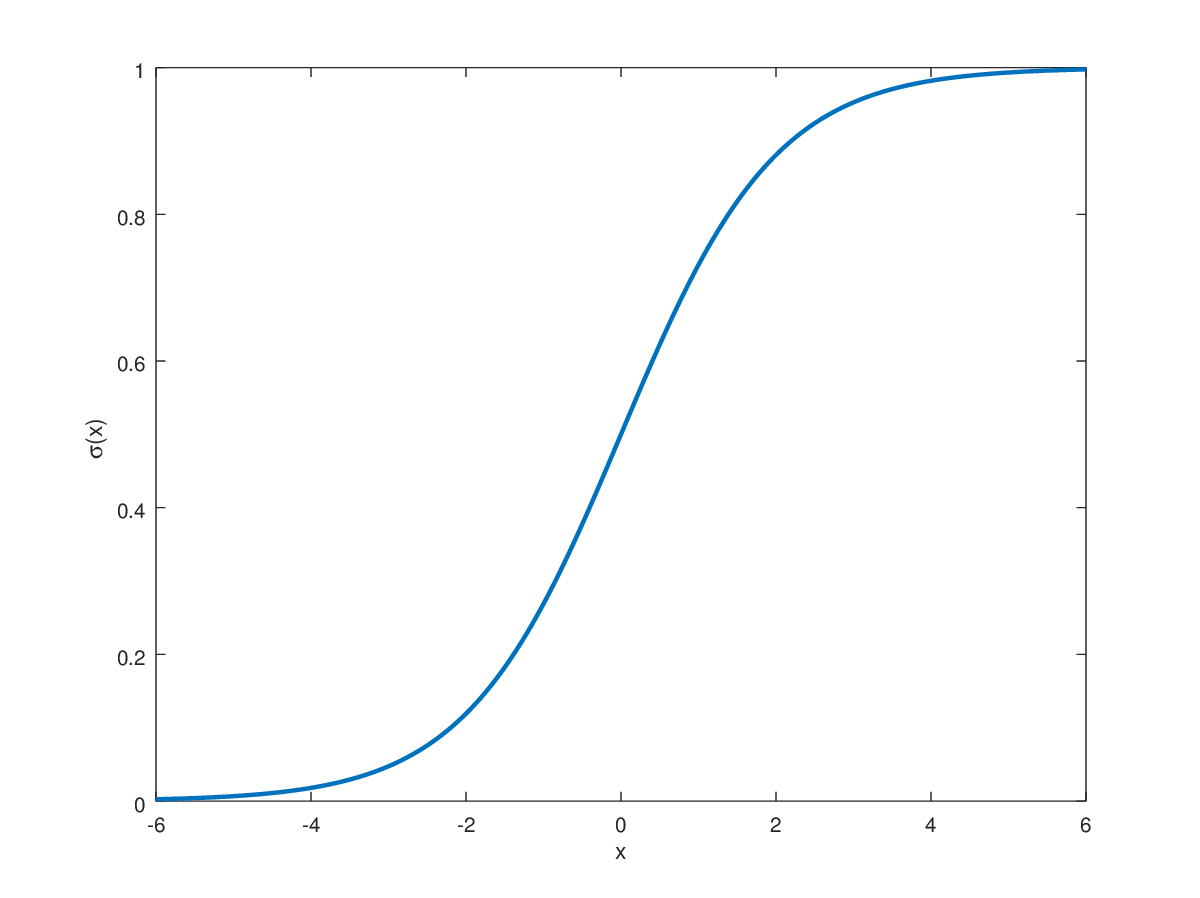

Als we die poorten willen maken met een neuron moeten we dus de parameters aanpassen.

Zoals je in de grafiek hierboven ziet moet je voor waardes 0 en 1 (wat we als output willen) extremere weights en bias hebben dan tussen de -1 en 1. De weights en bias moeten nu tussen de -10 en 10.

In [53]:
INVERT = Neuron([-7.0], 3.0) # invert-poort
print_neuron(INVERT)

<met input: [0] is output: 0.95>
<met input: [1] is output: 0.02>


In [54]:
AND = Neuron([4.65, 4.65], -7.07) #and-poort
print_neuron(AND)

<met input: [0, 0] is output: 0.0>
<met input: [0, 1] is output: 0.08>
<met input: [1, 0] is output: 0.08>
<met input: [1, 1] is output: 0.9>


In [55]:
OR = Neuron([6, 6], -3.0) # or-poort
print_neuron(OR)

<met input: [0, 0] is output: 0.05>
<met input: [0, 1] is output: 0.95>
<met input: [1, 0] is output: 0.95>
<met input: [1, 1] is output: 1.0>


NOR-poort neuron.

NOR-poort is met een sigmoid functie het omgekeerde van een AND-poort

In [56]:
NOR = Neuron([-7.07, -7.07, -7.07], 4.65)
print_neuron(NOR)

<met input: [0, 0, 0] is output: 0.99>
<met input: [0, 0, 1] is output: 0.08>
<met input: [0, 1, 0] is output: 0.08>
<met input: [0, 1, 1] is output: 0.0>
<met input: [1, 0, 0] is output: 0.08>
<met input: [1, 0, 1] is output: 0.0>
<met input: [1, 1, 0] is output: 0.0>
<met input: [1, 1, 1] is output: 0.0>


## Neuron layer

In [57]:
class NeuronLayer:
    """a layer has one or more neurons"""
    neurons: List[Neuron]

    def __init__(self, neurons: List[Neuron]):
        self.neurons = neurons


## Neuron network

In [58]:
class NeuronNetwork:
    """a network has one or more layers"""
    neuron_layers: List[NeuronLayer]

    def __init__(self, neuron_layers: List[NeuronLayer]):
        self.neuron_layers = neuron_layers

    def feed_forward(self, inputs: List[float]) -> List[List[float]]:
        """gives ouput of a network given a input"""
        output_and_input = [inputs]
        """input and output is used to store the output of a layer and uses it as a input for the next layer"""
        for layer in self.neuron_layers:
            """loop through all the layers"""
            output_and_input.append(list(pc.output(output_and_input[-1]) for pc in layer.neurons))
            
        return output_and_input[-1]


### neuron network testen

In [59]:
half_adder = NeuronNetwork([
                NeuronLayer([
                    Neuron([6, 6], -3.0), # OR-poort
                    Neuron([-6.2, -6.2], 9.3), # NAND-poort
                ]),
                NeuronLayer([
                    Neuron([4.65, 4.65], -7.07), # AND-poort
                    Neuron([0.0, -7.0], 3.0), # INVERT-poort
                ]),
])

print_neuron_network(half_adder)

<met input: [0, 0] is de output: [0.1, 0.02]>
<met input: [0, 1] is de output: [0.86, 0.02]>
<met input: [1, 0] is de output: [0.86, 0.02]>
<met input: [1, 1] is de output: [0.1, 0.94]>


de output is ongeveer de half-adder.